In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("seattle-weather.csv", index_col='date', parse_dates=True)
data

For illustrative purposes this is what our seasonal component will look like. We take the temperature for each day of the year, and average them to create a seasonal mean. The value for any given day of the year is the difference between the seasonal mean and the overall mean of the data.
It should be noted that this is actually 'cheating', because we generally will not know the overall mean in advance, thus we are actually using future data in our forcast. 

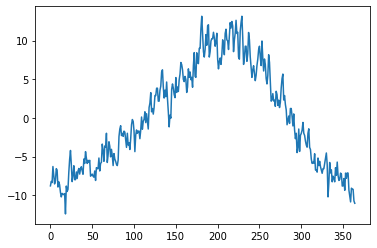

In [ ]:
tempmax = data[['temp_max']]
seasonal = np.zeros(365)
for i in range(365):
  overall_mean = tempmax.mean()
  seasonal_mean = tempmax[tempmax.index.dayofyear == i+1].mean()
  seasonal[i] = seasonal_mean - overall_mean
plt.plot(seasonal)
plt.show()

In [ ]:

alpha = 0.8
beta = 0.1
gamma = 0.1
tempmax = data[['temp_max']]

# Initialize the level, trend, and seasonal components
level = tempmax.iloc[0]
level = level.values[0]
trend = tempmax.iloc[1] - tempmax.iloc[0]
trend = trend.values[0]


def holt_winters():
  global level
  global trend
  
  # Implement the Holt-Winters algorithm
  for i, day in enumerate(data.index):
      # Compute the forecast for the next time step
      forecast = level + trend + seasonal[i%365]
      data.loc[day, 'forecast'] = forecast
      

      #level = alpha * (observation - seasonal) + (1 - alpha) * (level_prev + trend_prev)
      observation = tempmax.iloc[i].values[0] 
      level_new = alpha * (observation - seasonal[i%365]) + (1-alpha) * (level+trend)
      trend_new = beta * (level_new - level) + (1-beta) * trend
      seasonal_new = gamma * (observation - level_new) + (1 - gamma) * seasonal[i%365]

      # update variables for next iteration
      level, trend, seasonal[i%365] = level_new, trend_new, seasonal_new


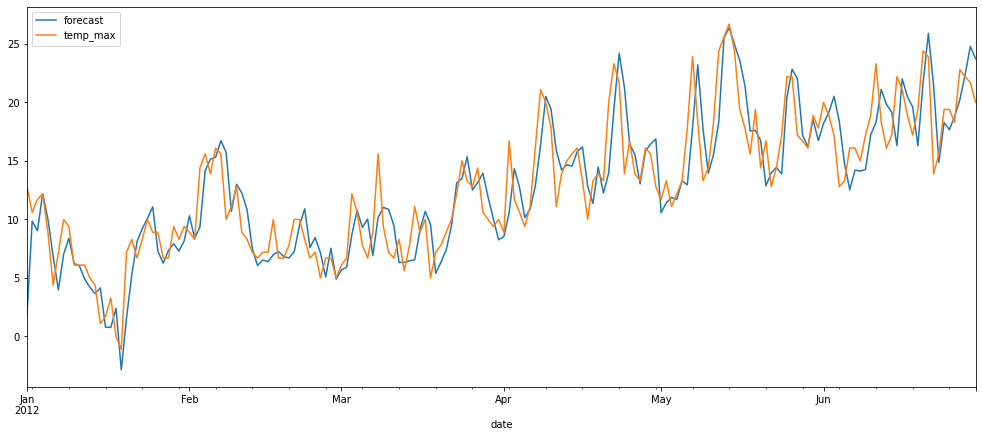

In [ ]:
holt_winters()
data[['forecast', 'temp_max']][:'2012-06-30'].plot(figsize=(17,7))
plt.show()

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [ ]:
model = ExponentialSmoothing(tempmax, trend='add', seasonal='add', seasonal_periods=365, freq='D')
results = model.fit(smoothing_level=0.8, smoothing_trend=0.1, smoothing_seasonal=0.1)

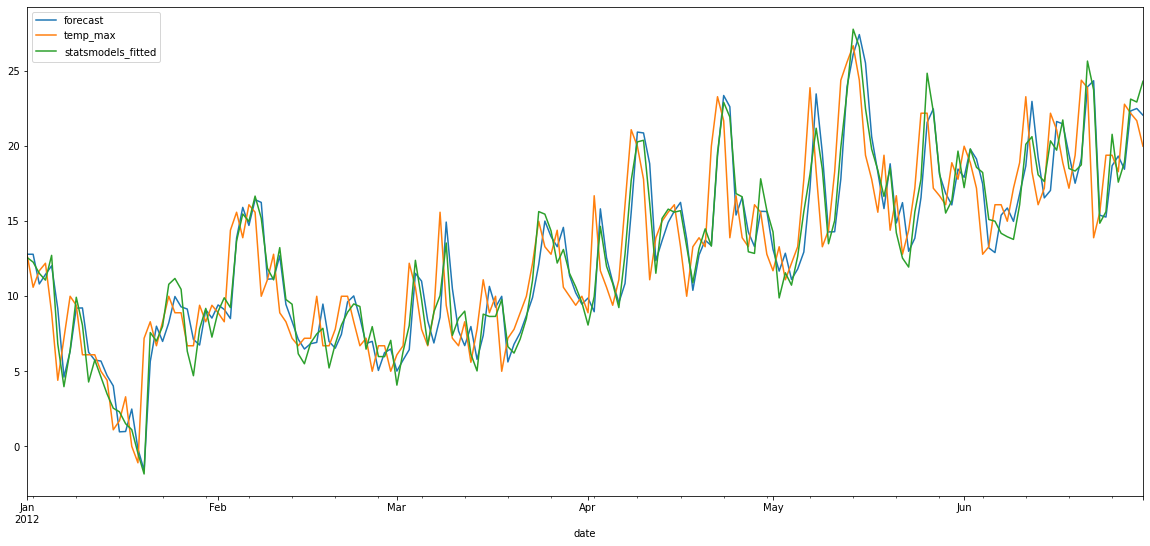

In [ ]:
fitted = results.fittedvalues
actual = tempmax.values
timeaxis = data.index
data['statsmodels_fitted'] = fitted

data[['forecast', 'temp_max', 'statsmodels_fitted']][:'2012-06-30'].plot(figsize=(20,9))
plt.show()

In [ ]:
results.fcastvalues

array([6.09416418])